In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df = pd.read_csv('train.csv')


In [ ]:
print(df.head())
print(df.shape)

[col for col in df.columns if df[col].isnull().sum()>0]

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
(891, 12)


['Age', 'Cabin', 'Embarked']

In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:

anova_df = df.dropna(subset=['Age'])


group1 = anova_df[anova_df['Pclass'] == 1]['Age']
group2 = anova_df[anova_df['Pclass'] == 2]['Age']
group3 = anova_df[anova_df['Pclass'] == 3]['Age']


from scipy.stats import f_oneway
f_stat, p_val = f_oneway(group1, group2, group3)

print("=== ANOVA Test: Age vs Pclass ===")
print("F-statistic:", f_stat)
print("p-value:", p_val)


=== ANOVA Test: Age vs Pclass ===
F-statistic: 57.44348434067624
p-value: 7.487984171959213e-24


In [ ]:

contingency = pd.crosstab(df['Survived'], df['Sex'])


from scipy.stats import chi2_contingency
chi2_stat, p, dof, expected = chi2_contingency(contingency)

print("\n=== Chi-Square Test: Survived vs Sex ===")
print("Chi-square statistic:", chi2_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)



=== Chi-Square Test: Survived vs Sex ===
Chi-square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degrees of freedom: 1
Expected frequencies:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [ ]:
from sklearn.feature_selection import VarianceThreshold


constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df.select_dtypes(include=[np.number]))


constant_features = [column for column, var in zip(df.select_dtypes(include=[np.number]).columns, constant_filter.variances_) if var == 0]

print("Constant features:", constant_features)


Constant features: []


In [ ]:
quasi_constant_features = []

for col in df.columns:

    predominant_freq = df[col].value_counts(normalize=True, dropna=False).values[0]
    if predominant_freq > 0.98:
        quasi_constant_features.append(col)

print("Quasi-constant features:", quasi_constant_features)


Quasi-constant features: []


Highly correlated pairs (|corr| > 0.9):


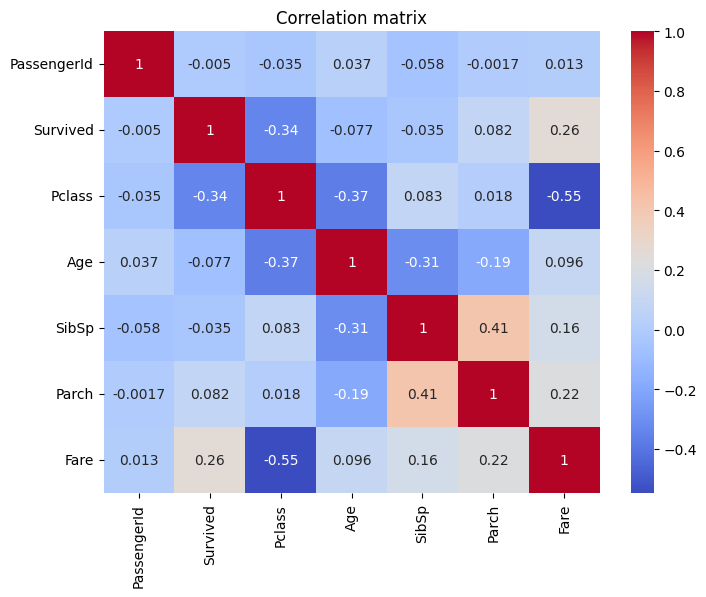

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.select_dtypes(include=[np.number]).corr()


high_corr_var = [(i, j, corr_matrix.loc[i, j])
                 for i in corr_matrix.columns for j in corr_matrix.columns
                 if i != j and abs(corr_matrix.loc[i, j]) > 0.9]

print("Highly correlated pairs (|corr| > 0.9):")
for i, j, corr_val in high_corr_var:
    print(f"{i} and {j}: {corr_val}")


plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_classif


X = df.drop('Survived', axis=1)
y = df['Survived']


X_encoded = pd.get_dummies(X, drop_first=True)


X_encoded = X_encoded.fillna(X_encoded.median())


mi = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=42)

mi_series = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)

print("Mutual Information of features with Survived:")
print(mi_series)


Mutual Information of features with Survived:
Sex_male                                              0.151015
Fare                                                  0.118896
Ticket_3460                                           0.064408
Pclass                                                0.063888
Name_Homer, Mr. Harry ("Mr E Haven")                  0.055511
                                                        ...   
Name_Gaskell, Mr. Alfred                              0.000000
Name_Garside, Miss. Ethel                             0.000000
Name_Garfirth, Mr. John                               0.000000
Name_Graham, Mrs. William Thompson (Edith Junkins)    0.000000
Ticket_248698                                         0.000000
Length: 1725, dtype: float64


In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")


Number of duplicate rows: 0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv('/content/drive/MyDrive/ml  lab/titanic_test.csv')

In [ ]:
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(df.select_dtypes(include=[np.number]))
constant_features = [col for col, var in zip(df.select_dtypes(include=[np.number]).columns, constant_filter.variances_) if var == 0]
print("Constant features:", constant_features)

Constant features: []


In [ ]:
quasi_constant_features = []
for col in df.columns:
    predominant_freq = df[col].value_counts(normalize=True, dropna=False).values[0]
    if predominant_freq > 0.98:
        quasi_constant_features.append(col)
print("Quasi-constant features:", quasi_constant_features)


Quasi-constant features: []


In [ ]:
corr_matrix = df.select_dtypes(include=[np.number]).corr()
high_corr_pairs = [(i, j, corr_matrix.loc[i, j]) for i in corr_matrix.columns for j in corr_matrix.columns
                   if i != j and abs(corr_matrix.loc[i, j]) > 0.9]
print("Highly correlated pairs (|corr| > 0.9):")
for i, j, corr_val in high_corr_pairs:
    print(f"{i} and {j}: {corr_val}")

Highly correlated pairs (|corr| > 0.9):


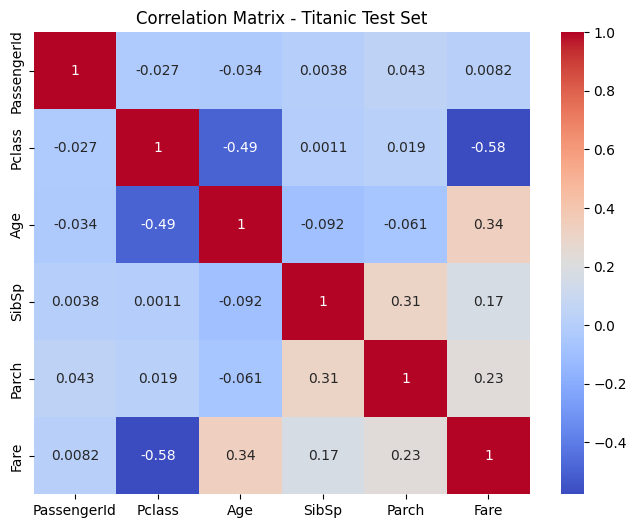

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Titanic Test Set")
plt.show()


In [ ]:
duplicates_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")


Number of duplicate rows: 0


In [ ]:
if 'Survived' in df.columns:
    from sklearn.feature_selection import mutual_info_classif
    X = df.drop('Survived', axis=1)
    y = df['Survived']
    X_encoded = pd.get_dummies(X, drop_first=True)
    X_encoded = X_encoded.fillna(X_encoded.median())
    mi = mutual_info_classif(X_encoded, y, discrete_features='auto', random_state=42)
    mi_series = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)
    print("Mutual Information scores:")
    print(mi_series)
else:
    print("No 'Survived' column found; skipping mutual information calculation.")

No 'Survived' column found; skipping mutual information calculation.


In [ ]:
anova_df = df.dropna(subset=['Age', 'Pclass'])

group1 = anova_df[anova_df['Pclass'] == 1]['Age']
group2 = anova_df[anova_df['Pclass'] == 2]['Age']
group3 = anova_df[anova_df['Pclass'] == 3]['Age']

f_stat, p_val = f_oneway(group1, group2, group3)

print("ANOVA Test: Age vs Pclass")
print("F-statistic:", f_stat)
print("p-value:", p_val)

ANOVA Test: Age vs Pclass
F-statistic: 56.40445192973902
p-value: 8.662751923341854e-22


In [ ]:
if 'Survived' in df.columns:
    contingency_table = pd.crosstab(df['Survived'], df['Sex'])
    chi2_stat, p, dof, expected = chi2_contingency(contingency_table)

    print("\nChi-Square Test: Survived vs Sex")
    print("Chi-square statistic:", chi2_stat)
    print("p-value:", p)
    print("Degrees of freedom:", dof)
else:
    print("\nNo 'Survived' column found. Chi-Square test cannot be performed.")


No 'Survived' column found. Chi-Square test cannot be performed.


In [ ]:

df_test = pd.read_csv('test.csv')
X = df_test.drop('Survived', axis=1)
y = df_test['Survived']


X_encoded = pd.get_dummies(X, drop_first=True)


X_encoded = X_encoded.fillna(X_encoded.median())


X_train, X_val, y_train, y_val = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


importances = pd.Series(clf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)

print("Feature importances from Random Forest (test set):")
print(importances)

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
df=pd.read_csv('/content/drive/MyDrive/ml  lab/titanic_train.csv')

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/ml  lab/titanic_train.csv')


imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])


df['Embarked'] = df['Embarked'].fillna('S')


label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


df = df.drop(columns=['Name', 'Ticket', 'Cabin'])


X = df.drop(columns=['Survived'])
y = df['Survived']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score


df = pd.read_csv('/content/drive/MyDrive/ml  lab/titanic_train.csv')


imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])


df['Embarked'] = df['Embarked'].fillna('S')


label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


df = df.drop(columns=['Name', 'Ticket', 'Cabin'])


X = df.drop(columns=['Survived'])
y = df['Survived']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model = LogisticRegression()


rfe = RFE(estimator=model, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)


model.fit(X_train_rfe, y_train)


selected_features = X.columns[rfe.support_]

print(f"Selected Features: {selected_features}")


X_test_rfe = X_test[:, rfe.support_]
y_pred = model.predict(X_test_rfe)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Selected Features: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked'], dtype='object')
Model Accuracy: 80.97%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_errors


lr_model = LinearRegression()


lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse:.2f}")


Linear Regression MSE: 0.14


In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


df = pd.read_csv('/content/drive/MyDrive/ml  lab/titanic_train.csv')


imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])


df['Embarked'] = df['Embarked'].fillna('S')


label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


df = df.drop(columns=['Name', 'Ticket', 'Cabin'])


X = df.drop(columns=['Survived'])
y = df['Survived']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

t
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


def forward_selection(X_train, y_train):
    remaining_features = list(X_train.columns)
    selected_features = []
    best_aic = float('inf')

    while remaining_features:
        aic_values = []


        for feature in remaining_features:
            features_to_try = selected_features + [feature]
            X_train_subset = X_train[features_to_try]


            model = sm.Logit(y_train, sm.add_constant(X_train_subset)).fit()


            aic_values.append((feature, model.aic))


        best_feature, best_aic_new = min(aic_values, key=lambda x: x[1])


        if best_aic_new < best_aic:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_aic = best_aic_new
        else:
            break

    return selected_features


selected_features = forward_selection(X_train, y_train)
print(f"Selected Features: {selected_features}")

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

final_model = sm.Logit(y_train, sm.add_constant(X_train_selected)).fit()


print(final_model.summary())


y_pred_selected = final_model.predict(sm.add_constant(X_test_selected))


from sklearn.metrics import accuracy_score
y_pred_bin = (y_pred_selected >= 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_bin)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


NameError: name 't' is not defined

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer


df = pd.read_csv('/content/drive/MyDrive/ml  lab/titanic_train.csv')


imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])


df['Embarked'] = df['Embarked'].fillna('S')


label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


df = df.drop(columns=['Name', 'Ticket', 'Cabin'])


X = df.drop(columns=['Survived'])
y = df['Survived']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


def forward_selection(X_train, y_train):
    remaining_features = list(X_train.columns)
    selected_features = []
    best_aic = float('inf')

    while remaining_features:
        aic_values = []


        for feature in remaining_features:
            features_to_try = selected_features + [feature]
            X_train_subset = X_train[features_to_try]

            model = sm.Logit(y_train, sm.add_constant(X_train_subset)).fit()


            aic_values.append((feature, model.aic))


        best_feature, best_aic_new = min(aic_values, key=lambda x: x[1])

        if best_aic_new < best_aic:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            best_aic = best_aic_new
        else:
            break

    return selected_features

selected_features = forward_selection(X_train, y_train)
print(f"Selected Features: {selected_features}")


X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


final_model = sm.Logit(y_train, sm.add_constant(X_train_selected)).fit()


print(final_model.summary())

t
y_pred_selected = final_model.predict(sm.add_constant(X_test_selected))


from sklearn.metr


SyntaxError: invalid syntax (ipython-input-3517285128.py, line 88)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score


df = pd.read_csv('/content/drive/MyDrive/ml  lab/titanic_train.csv')


imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])


df['Embarked'] = df['Embarked'].fillna('S')


label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


df = df.drop(columns=['Name', 'Ticket', 'Cabin'])


X = df.drop(columns=['Survived'])
y = df['Survived']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model = LogisticRegression()


sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=5, direction='forward')
X_train_sfs = sfs.fit_transform(X_train, y_train)


model.fit(X_train_sfs, y_train)


selected_features = X.columns[sfs.get_support()]

print(f"Selected Features: {selected_features}")


X_test_sfs = X_test[:, sfs.get_support()]
y_pred = model.predict(X_test_sfs)


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Selected Features: Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], dtype='object')
Model Accuracy: 79.48%


In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LogisticRegression

efs = ExhaustiveFeatureSelector(
    LogisticRegression(max_iter=1000),
    min_features=2,
    max_features=5,
    scoring='accuracy',
    print_progress=True,
    cv=5
)

efs = efs.fit(X_train, y_train)
best_features = X_train.columns[list(efs.best_idx_)]
print("Best features:", best_features)


NameError: name 'X_train' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml  lab/titanic_train.csv')

In [ ]:

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])


X = df.drop(columns='Survived')
y = df['Survived']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
efs = ExhaustiveFeatureSelector(
    RandomForestClassifier(n_estimators=100, random_state=42),
    min_features=1,
    max_features=4,
    scoring='roc_auc',
    print_progress=True,
    cv=3
)

efs = efs.fit(X_train, y_train)


Features: 162/162

In [ ]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_]
print("Selected features by RFE:", selected_features)



Selected features by RFE: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'], dtype='object')


In [ ]:
model.fit(X_train[selected_features], y_train)
y_pred_proba = model.predict_proba(X_test[selected_features])[:, 1]

from sklearn.metrics import roc_auc_score
print("ROC AUC (RFE):", roc_auc_score(y_test, y_pred_proba))


ROC AUC (RFE): 0.8765122265122264


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
)

pipeline.fit(X_train, y_train)


model = pipeline.named_steps['logisticregression']
coef = model.coef_[0]
selected_features = X_train.columns[coef != 0]

print("Selected features via L1 regularization:", list(selected_features))


Selected features via L1 regularization: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np


pipeline_l2 = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
)

pipeline_l2.fit(X_train, y_train)


model_l2 = pipeline_l2.named_steps['logisticregression']
coefficients = model_l2.coef_[0]


feature_importance = pd.Series(coefficients, index=X_train.columns)
print("L2 Regularized Coefficients:")
print(feature_importance.sort_values(key=abs, ascending=False))


L2 Regularized Coefficients:
Sex           1.276302
Pclass       -0.783826
Age          -0.395427
SibSp        -0.348672
Embarked_S   -0.189555
Fare          0.127490
Parch        -0.097063
Embarked_Q   -0.046433
dtype: float64


Best ElasticNet parameters: {'logisticregression__C': np.float64(0.1), 'logisticregression__l1_ratio': 0.3}
Best CV AUC: 0.8436589947242904
Selected features (non-zero coefficients):
Sex           1.144303
Pclass       -0.681598
Age          -0.296996
SibSp        -0.266735
Embarked_S   -0.145559
Fare          0.115402
Parch        -0.045731
dtype: float64


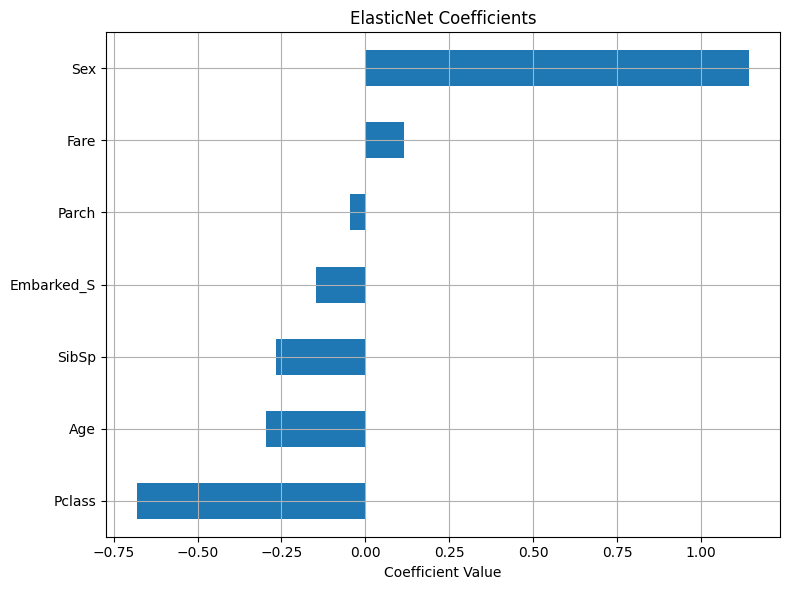

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
pipeline_en = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='elasticnet', solver='saga', random_state=42, max_iter=5000)
)
param_grid = {
    'logisticregression__C': np.logspace(-3, 2, 6),
    'logisticregression__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

grid_en = GridSearchCV(
    pipeline_en,
    param_grid,
    cv=5,
    scoring='roc_auc',
    verbose=0
)

grid_en.fit(X_train, y_train)

print("Best ElasticNet parameters:", grid_en.best_params_)
print("Best CV AUC:", grid_en.best_score_)
best_model = grid_en.best_estimator_.named_steps['logisticregression']
coefs = best_model.coef_[0]


feature_weights = pd.Series(coefs, index=X_train.columns)
selected_features = feature_weights[feature_weights != 0].sort_values(key=abs, ascending=False)

print("Selected features (non-zero coefficients):")
print(selected_features)
selected_features.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("ElasticNet Coefficients")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List the contents to verify the path
os.listdir('/content/drive/MyDrive')
os.listdir('/content/drive/MyDrive/ml  lab')  # or 'ml lab' if that was a typo


['titanic_train.csv', 'titanic_test.csv']

In [ ]:
# HOUSE PRICE TEST

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving house_price_test.csv to house_price_test.csv


In [ ]:
import pandas as pd
df = pd.read_csv('house_price_test.csv')


In [ ]:
print(df.shape)
df.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:

constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)


Constant features: ['Utilities']


In [ ]:

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
selector.fit(df.select_dtypes(include='number'))

quasi_constant_features = df.select_dtypes(include='number').columns[~selector.get_support()]
print("Quasi-constant features:", list(quasi_constant_features))


Quasi-constant features: []


In [ ]:
duplicate_features = []
cols = df.columns
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if df[cols[i]].equals(df[cols[j]]):
            duplicate_features.append(cols[j])

print("Duplicate features:", duplicate_features)


Duplicate features: []


In [ ]:
correlation_matrix = df.corr(numeric_only=True).abs()
upper_triangle = correlation_matrix.where(
    ~pd.isnull(correlation_matrix)).where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

highly_correlated = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Highly correlated features (corr > 0.9):", highly_correlated)


Highly correlated features (corr > 0.9): ['YrSold']


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/ml lab/house_price_test.csv')


corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(14, 10))


sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            square=True)

plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ml lab/house_price_test.csv'

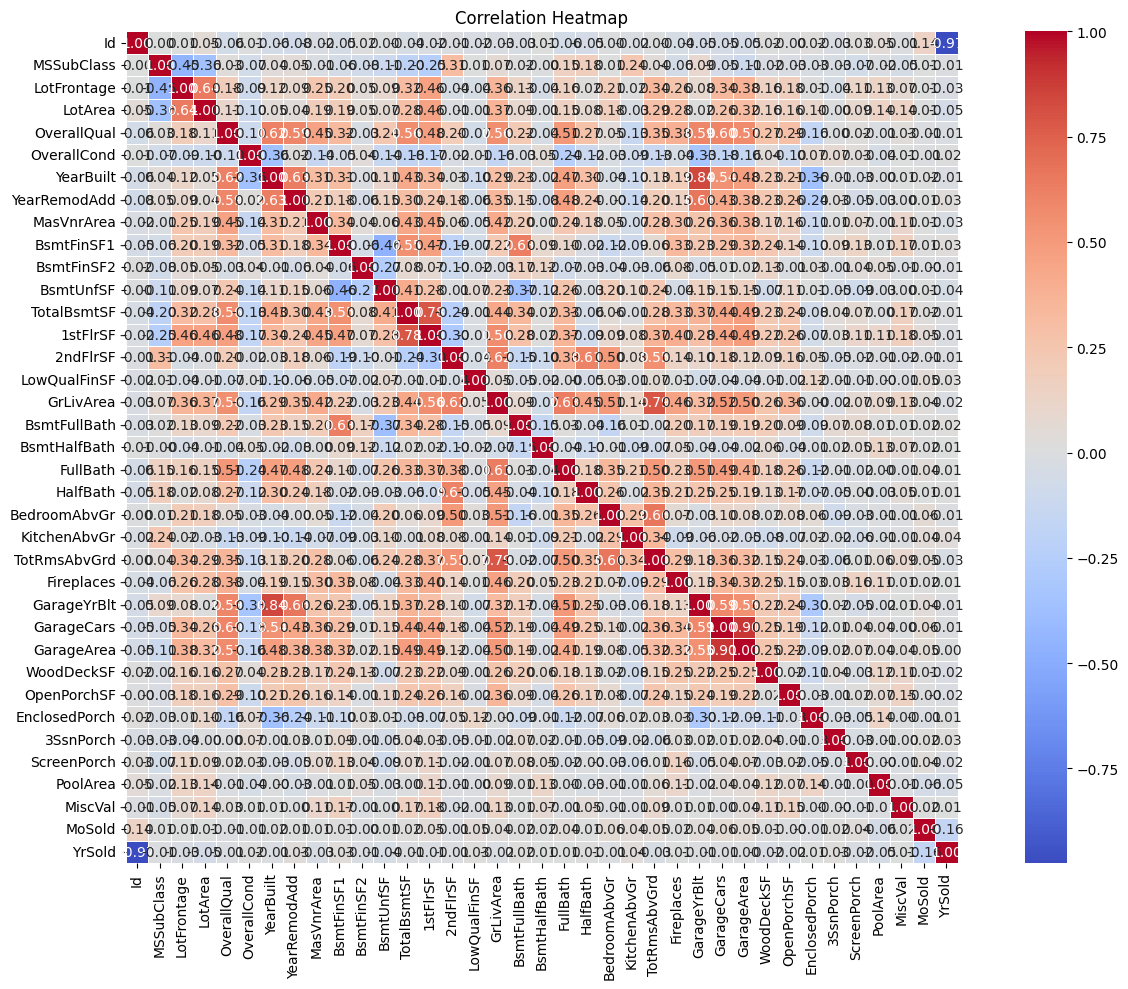

In [ ]:
corr_matrix = df.corr(numeric_only=True)


plt.figure(figsize=(14, 10))


sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.5,
            square=True)


plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X.select_dtypes(include='number'))
chi_scores = chi2(X_scaled, y)
chi_series = pd.Series(chi_scores[0], index=X.select_dtypes(include='number').columns)
print(chi_series.sort_values(ascending=False))


Sex       170.348127
Pclass     27.232933
Fare        8.819172
Parch       1.682917
SibSp       0.322733
Age         0.275991
dtype: float64


In [ ]:
from sklearn.feature_selection import f_classif, f_regression

f_scores = f_classif(X.select_dtypes(include='number'), y)



anova_series = pd.Series(f_scores[0], index=X.select_dtypes(include='number').columns)
print(anova_series.sort_values(ascending=False))


Sex       372.405724
Pclass    115.031272
Fare       63.030764
Parch       5.963464
Age         3.761528
SibSp       1.110572
dtype: float64


In [ ]:
from sklearn.metrics import roc_auc_score

for col in X.columns:
    try:
        auc = roc_auc_score(y, X[col])
        print(f"{col}: {auc:.4f}")
    except:
        pass


Pclass: 0.3186
Sex: 0.7669
Age: 0.4782
SibSp: 0.5432
Parch: 0.5612
Fare: 0.6921
Embarked_Q: 0.5011
Embarked_S: 0.4313


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
          k_features='best',
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

sfs = sfs.fit(X.select_dtypes(include='number').fillna(0), y)
print("Selected features:", sfs.k_feature_names_)


Selected features: ('Pclass', 'Sex', 'Age', 'SibSp')


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
          k_features='best',
          forward=False,
          floating=False,
          scoring='r2',
          cv=5)

sfs = sfs.fit(X.select_dtypes(include='number').fillna(0), y)
print("Selected features:", sfs.k_feature_names_)


Selected features: ('Pclass', 'Sex', 'Age', 'SibSp')


In [ ]:
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X.select_dtypes(include='number').fillna(0), y)

print("Top features:", X.columns[rfe.support_])


IndexError: boolean index did not match indexed array along axis 0; size of axis is 8 but size of corresponding boolean axis is 6

In [ ]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5)
model.fit(X.select_dtypes(include='number').fillna(0), y)

print("Selected features:", X.columns[model.coef_ != 0])


IndexError: boolean index did not match indexed array along axis 0; size of axis is 8 but size of corresponding boolean axis is 6

In [ ]:
# Select only numeric columns for training
X_num = X.select_dtypes(include='number').fillna(0)

# Train LASSO model
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5)
model.fit(X_num, y)

# Now match columns with coefficients
selected_features = X_num.columns[model.coef_ != 0]
print("Selected features:", list(selected_features))


Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV

X = df.drop('target_column', axis=1)
y = df['target_column']

X_num = X.select_dtypes(include='number').fillna(0)

model = ElasticNetCV(cv=5)
model.fit(X_num, y)

coef_df = pd.Series(model.coef_, index=X_num.columns)


selected = coef_df[coef_df != 0]


plt.figure(figsize=(10, 6))
selected.sort_values().plot(kind='barh', color='teal')
plt.title('Elastic Net Selected Features & Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyError: "['target_column'] not found in axis"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV


df = pd.read_csv('/content/drive/MyDrive/ml lab/house_price_test.csv')


target_col = 'SalePrice'


X = df.drop(target_col, axis=1)
y = df[target_col]

X_num = X.select_dtypes(include='number').fillna(0)

model = ElasticNetCV(cv=5)
model.fit(X_num, y)


coef_df = pd.Series(model.coef_, index=X_num.columns)


selected = coef_df[coef_df != 0]


plt.figure(figsize=(10, 6))
selected.sort_values().plot(kind='barh', color='teal')
plt.title('Elastic Net Selected Features & Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ml lab/house_price_test.csv'

In [ ]:
target_col = 'SalePrice'


X = df.drop(target_col, axis=1)
y = df[target_col]


X_num = X.select_dtypes(include='number').fillna(0)


model = ElasticNetCV(cv=5)
model.fit(X_num, y)


coef_df = pd.Series(model.coef_, index=X_num.columns)


selected = coef_df[coef_df != 0]


plt.figure(figsize=(10, 6))
selected.sort_values().plot(kind='barh', color='teal')
plt.title('Elastic Net Selected Features & Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


KeyError: "['SalePrice'] not found in axis"

In [ ]:
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
target_col = 'SaleType'
